# <font color='blue'>Data Science Academy - Python Fundamentos</font>

## Missão: Analisar o Comportamento de Compra de Consumidores.

Você recebeu a tarefa de analisar os dados de compras de um web site! Os dados estão no formato JSON e disponíveis junto com este notebook.

No site, cada usuário efetua login usando sua conta pessoal e pode adquirir produtos à medida que navega pela lista de produtos oferecidos. Cada produto possui um valor de venda. Dados de idade e sexo de cada usuário foram coletados e estão fornecidos no arquivo JSON.

Seu trabalho é entregar uma análise de comportamento de compra dos consumidores. Esse é um tipo de atividade comum realizado por Cientistas de Dados e o resultado deste trabalho pode ser usado, por exemplo, para alimentar um modelo de Machine Learning e fazer previsões sobre comportamentos futuros.

Mas nesta missão você vai analisar o comportamento de compra dos consumidores usando o pacote Pandas da linguagem Python e seu relatório final deve incluir cada um dos seguintes itens:

**Contagem de Consumidores**

* Número total de consumidores


**Análise Geral de Compras**

* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total


**Informações Demográficas Por Gênero**

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados


**Análise de Compras Por Gênero**

* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária


**Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):**

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares


**Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):**

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos


**Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela):**

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra


**Como considerações finais:**

* Seu script deve funcionar para o conjunto de dados fornecido.
* Você deve usar a Biblioteca Pandas e o Jupyter Notebook.


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from matplotlib import cm

plt.style.use("seaborn-muted")
sns.set_style('darkgrid')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# locale.setlocale(locale.LC_MONETARY, 'pt_BR.UTF-8')

%matplotlib inline

In [3]:
# Carrega o arquivo
load_file = "dados_compras.json"
purchase_file = pd.read_json(load_file, orient = "records")
purchase_file.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,164,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


## Informações Sobre os Consumidores
* Número total de consumidores

In [4]:
df = purchase_file.groupby('Login').size()
pd.DataFrame({'Total de Consumidores': [df.shape[0]]})

,Total de Consumidores
0,573


Nesta solução apliquei o agrupamento da variável <i>Login</i> do consumidor e peguei o <i>shape[0]</i> que representa o número de linhas. Dessa forma a contagem é distinta.

## Análise Geral de Compras
* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total

In [5]:
itens = len(purchase_file['Item ID'].unique())
preco_medio = np.mean(purchase_file['Valor'])
compras = purchase_file['Valor'].count()
total = np.sum(purchase_file['Valor'])

resultado = pd.DataFrame({
    'Número de itens exclusivos': itens,
    'Preço médio de compra': '$ {}'.format(round(preco_medio, 2)),
    'Número total de compras': compras,
    'Rendimento total': ['$ {}'.format(total)]
})

resultado

,Número de itens exclusivos,Preço médio de compra,Número total de compras,Rendimento total
0,183,$ 2.93,780,$ 2286.33


Para esta solução, primeiramente, fiz os cálculos necessários, se atendo a realizar uma contagem distinta dos itens, e criei um DataFrame a partir de um dicionário com os respectivos valores formatados.

## Informações Demográficas Por Gênero
* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados

In [12]:
df_gen = purchase_file.drop_duplicates(subset='Login')
count_generos = df_gen['Sexo'].value_counts()
pct_generos = (count_generos/df.shape[0])*100

genero = pd.DataFrame({
    'Contagem': count_generos,
    'Porcentagem %': pct_generos
})

genero

,Contagem,Porcentagem %
Masculino,465,81.15
Feminino,100,17.45
Outro / Não Divulgado,8,1.40


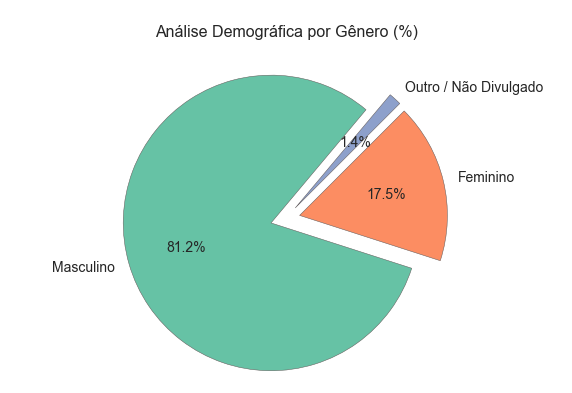

In [134]:
plt.figure(figsize=(10, 6))

labels = ['Masculino', 'Feminino', 'Outro / Não Divulgado']
cs = cm.Set2(np.arange(12))

plt.pie(
    count_generos,
    explode = (0.1, 0.1, 0.1),
    colors=cs,
    labels=labels,
    autopct='%1.1f%%',
    textprops={'fontsize':14, 'weight':'medium'},
    startangle=50,
    wedgeprops={'linewidth':0.5, 'edgecolor':'#615A59'}
)

plt.axis('equal')
plt.title('\nAnálise Demográfica por Gênero (%)\n', fontsize=16)

plt.show()

Primeiramente fiz os cálculos necessários e criei um DataFrame a partir de um dicionário. Também implementei uma figura para compreender melhor a distribuição por gênero.
A maioria dos consumidores, claramente, são do sexo masculino.

## Análise de Compras Por Gênero
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária

In [8]:
total_gen = purchase_file.groupby('Sexo').sum()['Valor']
media_gen = purchase_file.groupby('Sexo').mean()['Valor']
compras_gen = purchase_file.groupby('Sexo').count()['Valor']

analise = pd.DataFrame({
    'Total de compras': compras_gen,
    'Preço médio de compra': media_gen.map('$ {:.2f}'.format),
    'Valor Total de Compra': total_gen.map('$ {:.2f}'.format)
}).reset_index()

analise

,Sexo,Total de compras,Preço médio de compra,Valor Total de Compra
0,Feminino,136,$ 2.82,$ 382.91
1,Masculino,633,$ 2.95,$ 1867.68
2,Outro / Não Divulgado,11,$ 3.25,$ 35.74


A maioria das compras foram realizadas por consumidores do sexo masculino.

**Compras for faixa etária**

In [9]:
print('Mapeando idade dos compradores')
print('='*30)
print('Menor idade: {}\nMaior idade: {}'
      .format(df_gen['Idade'].min(),df_gen['Idade'].max()))
print('='*30)

Mapeando idade dos compradores
Menor idade: 7
Maior idade: 45


In [72]:
# criando variavel categorica para faixa de idade
idade = [0, 9, 19, 29, 39, 999]
faixa = ['Menor de 10', '10 a 19', '20 a 29', '30 a 39', 'Maior de 40']
purchase_file['Faixa Etaria'] = pd.cut(purchase_file['Idade'], bins=idade, labels=faixa)
purchase_file.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor,Faixa Etaria
0,Aelalis34,38,Masculino,164,Bone Crushing Silver Skewer,3.37,30 a 39
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32,20 a 29
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46,30 a 39
3,Pheusrical25,21,Masculino,92,Final Critic,1.36,20 a 29
4,Aela59,23,Masculino,63,Stormfury Mace,1.27,20 a 29


In [75]:
contagem_faixa = purchase_file.groupby('Faixa Etaria').size()
media_faixa = purchase_file.groupby('Faixa Etaria').mean()['Valor']
total_valor = purchase_file.groupby('Faixa Etaria').sum()['Valor']
pct_faixa = (contagem_faixa/df.shape[0])*100

analise_faixa_etaria = pd.DataFrame({
    'Contagem': contagem_faixa,
    'Média $': media_faixa,
    'Pct %': pct_faixa,
    'Total $': total_valor
}).reset_index()

analise_faixa_etaria

,Faixa Etaria,Contagem,Média $,Pct %,Total $
0,Menor de 10,28,2.98,4.89,83.46
1,10 a 19,168,2.88,29.32,483.37
2,20 a 29,461,2.93,80.45,1349.10
3,30 a 39,106,2.99,18.50,316.65
4,Maior de 40,17,3.16,2.97,53.75


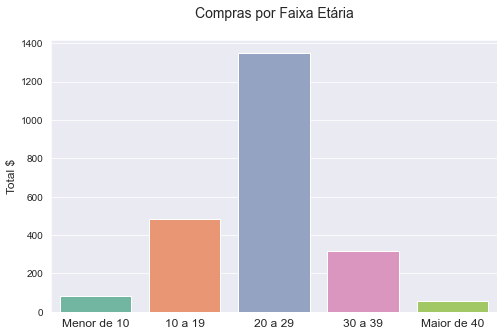

In [93]:
plt.figure(figsize=(8, 5))

sns.barplot(
    data=analise_faixa_etaria, 
    y='Total $', 
    x='Faixa Etaria', 
    palette='Set2'
)

plt.title('Compras por Faixa Etária\n', fontsize=14)
plt.ylabel('Total $', fontsize=12)
plt.xlabel('')
plt.xticks(fontsize=12)

plt.show()

Consumidores com idade entre 20 e 29 anos são os que compram mais. Consumidores com mais de 40 anos compram menos.

## Consumidores Mais Populares (Top 5)
**Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):**
* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra

In [83]:
total_compras = purchase_file.groupby('Login').count()['Valor']
media_compras = purchase_file.groupby('Login').mean()['Valor']
valor_compras = purchase_file.groupby(["Login"]).sum()["Valor"]

top5 = pd.DataFrame({
    'Total de compras': total_compras,
    'Preço médio de compra $': media_compras,
    'Valor total de compra $': valor_compras
}).reset_index()

top5.sort_values(by='Valor total de compra $', ascending=False).head(5)

,Login,Total de compras,Preço médio de compra $,Valor total de compra $
538,Undirrala66,5,3.41,17.06
428,Saedue76,4,3.39,13.56
354,Mindimnya67,4,3.18,12.74
181,Haellysu29,3,4.24,12.73
120,Eoda93,3,3.86,11.58


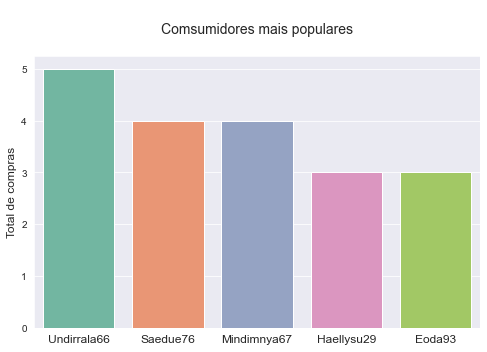

In [92]:
top5_grafico = top5.sort_values(by='Valor total de compra $', ascending=False).head(5)
plt.figure(figsize=(8, 5))

sns.barplot(
    data=top5_grafico, 
    y='Total de compras', 
    x='Login', 
    palette='Set2'
)

plt.title('\nComsumidores mais populares\n', fontsize=14)
plt.ylabel('Total de compras', fontsize=12)
plt.xlabel('')
plt.xticks(fontsize=12)

plt.show()

## Itens Mais Populares
**Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):**
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos

In [245]:
itens = purchase_file.groupby('Nome do Item').count()['Valor']
itens_valor = purchase_file.groupby('Nome do Item').sum()['Valor']
itens_preco = purchase_file.groupby('Nome do Item').mean()['Valor']

analise_itens = pd.DataFrame({
    'Número de compras': itens,
    'Preço do item $': itens_preco,
    'Total $': itens_valor
}).reset_index()

analise_itens = analise_itens.sort_values(by='Número de compras', ascending=False).head()
analise_itens

,Nome do Item,Número de compras,Preço do item $,Total $
56,Final Critic,14,2.76,38.60
8,Arcane Gem,11,2.23,24.53
11,"Betrayal, Whisper of Grieving Widows",11,2.35,25.85
137,Stormcaller,10,3.46,34.65
173,Woeful Adamantite Claymore,9,1.24,11.16


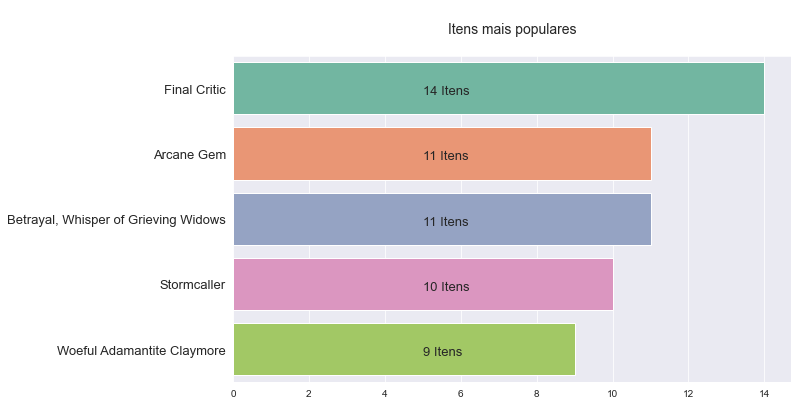

In [246]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=analise_itens, 
    x='Número de compras', 
    y='Nome do Item', 
    palette='Set2', 
    orient='h'
)

plt.title('\nItens mais populares\n', fontsize=14)
plt.ylabel('')
plt.yticks(fontsize=13)
plt.xlabel('')

for r in range(len(analise_itens.index)):
    plt.text(5, r+0.09, str(round(analise_itens['Número de compras'], 2)
             [analise_itens.index[r]]) + ' Itens', size=13)
    
plt.show()

## Itens Mais Lucrativos
**Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela):**

* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra

In [243]:
# Implemente aqui sua solução
itens = purchase_file.groupby('Nome do Item').count()['Valor']
itens_valor = purchase_file.groupby('Nome do Item').sum()['Valor']
itens_preco = purchase_file.groupby('Nome do Item').mean()['Valor']

analise_itens = pd.DataFrame({
    'Número de compras': itens,
    'Preço do item $': itens_preco,
    'Total $': itens_valor
}).reset_index()

analise_itens = analise_itens.sort_values(by='Total $', ascending=False).head()
analise_itens

,Nome do Item,Número de compras,Preço do item $,Total $
56,Final Critic,14,2.76,38.60
112,Retribution Axe,9,4.14,37.26
137,Stormcaller,10,3.46,34.65
132,Spectral Diamond Doomblade,7,4.25,29.75
96,Orenmir,6,4.95,29.70


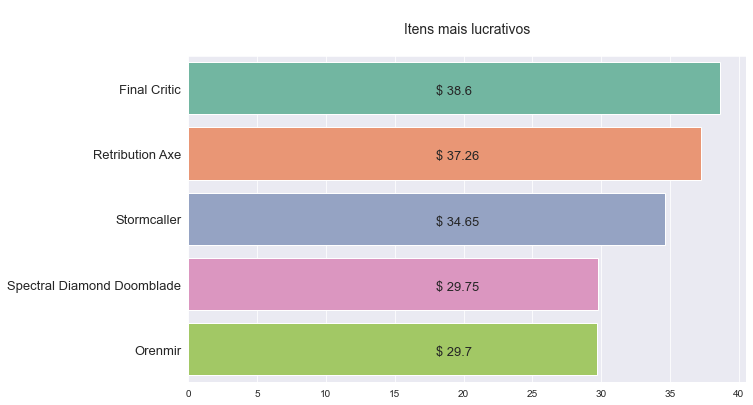

In [244]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=analise_itens, 
    x='Total $', 
    y='Nome do Item', 
    palette='Set2', 
    orient='h'
)

plt.title('\nItens mais lucrativos\n', fontsize=14)
plt.ylabel('')
plt.yticks(fontsize=13)
plt.xlabel('')

for r in range(len(analise_itens.index)):
    plt.text(18, r+0.09, '$ '+str(round(analise_itens['Total $'], 2)
             [analise_itens.index[r]]), size=13)
    
plt.show()

### Conclusão
**Sugestão 1:** Campanhas de marketing voltadas para clientes do sexo masculino, com idades entre 20 e 29 anos. Reforçar as campanhas para os clientes das outras categorias para gerar mais engajamento.<br>
**Sugestão 2:** Os clientes que mais compram poderiam receber algum tipo de incentivo para se tornarem promotores dos produtos.<br>
**Sugestão 3:** Reforçar campanhas para os produtos menos vendidos e averiguar se esses não são mais interessantes para os consumidores.